In [1]:
import pandas as pd
import CococoNet_reader
from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats
from pydeseq2.utils import load_example_data
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns


In [17]:
low_heat_sorg_1 = pd.read_csv(
    "/data/passala/Module_paper_data/maize_vs_sorghum_drought/sorghum/sorghum_control_stay_green_bt642_staygreen/run_1ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)
low_heat_sorg_2 = pd.read_csv(
    "/data/passala/Module_paper_data/maize_vs_sorghum_drought/sorghum/sorghum_control_stay_green_bt642_staygreen/run_2ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)
low_heat_sorg_3 = pd.read_csv(
    "/data/passala/Module_paper_data/maize_vs_sorghum_drought/sorghum/sorghum_control_stay_green_bt642_staygreen/run_3ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)


low_heat_sorg= pd.DataFrame(
    data=zip(
        low_heat_sorg_1["Reads"],
        low_heat_sorg_2["Reads"],
        low_heat_sorg_3["Reads"],
    ),
    columns=["Sorg Cold Rep 1", "Sorg Cold Rep 2" ,"Sorg Cold Rep 3",],
    index=low_heat_sorg_1.index,
)


In [18]:
low_heat_sorg

,Sorg Cold Rep 1,Sorg Cold Rep 2,Sorg Cold Rep 3
LOC8081570,8,7,4
LOC8059226,931,1145,859
LOC110434520,137,113,137
LOC8059546,1003,2023,1036
LOC8059547,565,721,502
...,...,...,...
SobiCp082,0,0,0
SobiCt047,0,0,0
SobiCt048,0,0,0
SobiCp083,0,0,0


In [19]:
high_heat_sorg_1 = pd.read_csv(
    "/data/passala/Module_paper_data/maize_vs_sorghum_drought/sorghum/sorghum_drough_stay_green_bt642_staygreen/run_1ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)
high_heat_sorg_2 = pd.read_csv(
    "/data/passala/Module_paper_data/maize_vs_sorghum_drought/sorghum/sorghum_drough_stay_green_bt642_staygreen/run_2ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)
high_heat_sorg_3 = pd.read_csv(
    "/data/passala/Module_paper_data/maize_vs_sorghum_drought/sorghum/sorghum_drough_stay_green_bt642_staygreen/run_3ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)


high_heat_sorg= pd.DataFrame(
    data=zip(
        high_heat_sorg_1["Reads"],
        high_heat_sorg_2["Reads"],
        high_heat_sorg_3["Reads"],
    ),
    columns=["Sorg Hot Rep 1", "Sorg Hot Rep 2" ,"Sorg Hot Rep 3",],
    index=high_heat_sorg_1.index,
)


In [20]:
high_heat_sorg

,Sorg Hot Rep 1,Sorg Hot Rep 2,Sorg Hot Rep 3
LOC8081570,5,4,3
LOC8059226,900,846,806
LOC110434520,137,116,121
LOC8059546,485,452,391
LOC8059547,580,420,482
...,...,...,...
SobiCp082,0,0,0
SobiCt047,0,0,0
SobiCt048,0,0,0
SobiCp083,0,0,0


In [24]:
combined_sorg = pd.concat([low_heat_sorg, high_heat_sorg], axis=1)

In [53]:
combined_sorg

,LOC8059226,LOC110434520,LOC8059546,LOC8059547,LOC8059227,LOC8059229,LOC8061368,LOC8059230,LOC110431639,LOC8059231,...,LOC8155627,LOC110431554,LOC110431570,LOC110431578,LOC8155322,LOC8155598,SobioMr01,SobioMr02,SobioMp23,SobioMp30
Sorg Cold Rep 1,931,137,1003,565,2561,16,25,4420,943,2970,...,163,14,20,112,52,285,4911,1100,15,42
Sorg Cold Rep 2,1145,113,2023,721,2755,21,42,5631,1211,3608,...,214,18,22,105,93,341,5462,1228,19,87
Sorg Cold Rep 3,859,137,1036,502,2365,22,38,4902,1042,2832,...,186,17,17,103,78,304,3859,1298,10,36
Sorg Hot Rep 1,900,137,485,580,2873,22,34,5443,1202,3575,...,214,27,21,124,20,339,4515,1102,10,83
Sorg Hot Rep 2,846,116,452,420,2613,24,33,4852,1008,3113,...,192,18,27,91,12,310,3983,946,23,54
Sorg Hot Rep 3,806,121,391,482,2859,14,43,4952,1119,3415,...,157,11,17,123,32,312,4099,1089,25,68


In [26]:
sorg_metadata = pd.DataFrame(
    columns=["Temp"],
    data=["Cold", "Cold", "Cold", "Hot", "Hot", "Hot"],
    index=[
        "Sorg Cold Rep 1",
        "Sorg Cold Rep 2",
        "Sorg Cold Rep 3",
        "Sorg Hot Rep 1",
        "Sorg Hot Rep 2",
        "Sorg Hot Rep 3",
    ],
)

In [33]:
low_heat_maize_1 = pd.read_csv(
    "/data/passala/Module_paper_data/maize_vs_sorghum_drought/maize/24h_maize_control/run_1ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)
low_heat_maize_2 = pd.read_csv(
    "/data/passala/Module_paper_data/maize_vs_sorghum_drought/maize/24h_maize_control/run_2ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)
low_heat_maize_3 = pd.read_csv(
    "/data/passala/Module_paper_data/maize_vs_sorghum_drought/maize/24h_maize_control/run_3ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)

low_heat_maize_4 = pd.read_csv(
    "/data/passala/Module_paper_data/maize_vs_sorghum_drought/maize/24h_maize_control/run_4ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)

low_heat_maize = pd.DataFrame(
    data=zip(
        low_heat_maize_1["Reads"],
        low_heat_maize_2["Reads"],
        low_heat_maize_3["Reads"],
        low_heat_maize_4["Reads"]
    ),
    columns=["maize Cold Rep 1", "maize Cold Rep 2", "maize Cold Rep 3","maize Cold Rep 4"],
    index=low_heat_maize_1.index,
)


In [34]:
low_heat_maize.index = low_heat_maize.index.str.split(':').str[1]
low_heat_maize

,maize Cold Rep 1,maize Cold Rep 2,maize Cold Rep 3,maize Cold Rep 4
Zm00001d000055,524,353,185,346
Zm00001d000058,0,0,0,0
Zm00001d000060,5,5,3,0
Zm00001d000061,0,0,0,0
Zm00001d000062,1,0,1,0
...,...,...,...,...
GRMZM5G885905,0,0,0,0
GRMZM5G866761,0,0,0,0
GRMZM5G818111,0,0,0,0
GRMZM5G866064,0,0,0,0


In [35]:
high_heat_maize_rep_1 = pd.read_csv(
    "/data/passala/Module_paper_data/maize_vs_sorghum_drought/maize/24h_maize_drought_severe/run_1ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)
high_heat_maize_rep_2 = pd.read_csv(
    "/data/passala/Module_paper_data/maize_vs_sorghum_drought/maize/24h_maize_drought_severe/run_2ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)
high_heat_maize_rep_3 = pd.read_csv(
    "/data/passala/Module_paper_data/maize_vs_sorghum_drought/maize/24h_maize_drought_severe/run_3ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)

high_heat_maize_rep_4 = pd.read_csv(
    "/data/passala/Module_paper_data/maize_vs_sorghum_drought/maize/24h_maize_drought_severe/run_4ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)
high_heat_maize = pd.DataFrame(
    data=zip(
        high_heat_maize_rep_1["Reads"],
        high_heat_maize_rep_2["Reads"],
        high_heat_maize_rep_3["Reads"],
        high_heat_maize_rep_4["Reads"]
    ),
    columns=["maize Hot Rep 1", "maize Hot Rep 2", "maize Hot Rep 3", "maize Hot Rep 4"],
    index=low_heat_maize_1.index,
)

In [36]:
high_heat_maize.index = high_heat_maize.index.str.split(':').str[1]
high_heat_maize

,maize Hot Rep 1,maize Hot Rep 2,maize Hot Rep 3,maize Hot Rep 4
Zm00001d000055,333,440,248,522
Zm00001d000058,0,0,0,0
Zm00001d000060,5,8,4,16
Zm00001d000061,0,0,0,0
Zm00001d000062,0,2,1,1
...,...,...,...,...
GRMZM5G885905,0,0,0,0
GRMZM5G866761,0,0,0,0
GRMZM5G818111,0,0,0,0
GRMZM5G866064,0,0,0,0


In [37]:
combined_maize = pd.concat([high_heat_maize, low_heat_maize], axis=1)

In [ ]:
combined_maize = combined_maize.T




In [42]:
combined_sorg = combined_sorg.T

In [54]:
combined_sorg.to_csv("/data/passala/Module_paper_data/maize_vs_sorghum_drought/Ortho_vs_gene_files/sorg_reads.csv")
combined_maize.to_csv("/data/passala/Module_paper_data/maize_vs_sorghum_drought/Ortho_vs_gene_files/maize_reads.csv")

In [39]:
maize_metadata = pd.DataFrame(
    columns=["Temp"],
    data=["Hot", "Hot", "Hot", "Hot","Cold","Cold", "Cold", "Cold"],
    index=[
        "maize Hot Rep 1",
        "maize Hot Rep 2",
        "maize Hot Rep 3",
        "maize Hot Rep 4",
        "maize Cold Rep 1",
        "maize Cold Rep 2",
        "maize Cold Rep 3",
        "maize Cold Rep 4"
    ],
)

In [47]:
genes_to_keep_sorg = combined_sorg.columns[combined_sorg.sum(axis=0) >= 100]
combined_sorg = combined_sorg[genes_to_keep_sorg]
inference_sorg = DefaultInference(n_cpus=30)
dds_sorg = DeseqDataSet(
    counts=combined_sorg,
    metadata=sorg_metadata,
    design_factors="Temp",
    refit_cooks=True,
    inference=inference_sorg,
)
dds_sorg.deseq2()
stat_res_sorg = DeseqStats(dds_sorg, inference=inference_sorg)
stat_res_sorg.summary()

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 1.26 seconds.

Fitting dispersion trend curve...
... done in 0.50 seconds.

Fitting MAP dispersions...
... done in 1.32 seconds.

Fitting LFCs...
... done in 1.11 seconds.

Refitting 0 outliers.

Running Wald tests...


Log2 fold change & Wald test p-value: Temp Hot vs Cold
                 baseMean  log2FoldChange     lfcSE      stat        pvalue  \
LOC8059226     909.380799       -0.225357  0.109087 -2.065833  3.884427e-02   
LOC110434520   127.033263       -0.095173  0.217097 -0.438389  6.611045e-01   
LOC8059546     883.104764       -1.610230  0.211967 -7.596604  3.040039e-14   
LOC8059547     539.923120       -0.299089  0.137198 -2.179974  2.925937e-02   
LOC8059227    2661.299025        0.089396  0.100692  0.887812  3.746417e-01   
...                   ...             ...       ...       ...           ...   
LOC8155598     313.724668        0.018480  0.130374  0.141744  8.872823e-01   
SobioMr01     4447.340943       -0.202810  0.119821 -1.692615  9.052879e-02   
SobioMr02     1125.544057       -0.244665  0.127890 -1.913086  5.573702e-02   
SobioMp23       17.045878        0.405880  0.552746  0.734298  4.627671e-01   
SobioMp30       60.296660        0.306705  0.333863  0.918656  3.582756e-01 

... done in 0.83 seconds.



In [48]:
genes_to_keep = combined_maize.columns[combined_maize.sum(axis=0) >= 100]
combined_maize = combined_maize[genes_to_keep]
inference = DefaultInference(n_cpus=30)
dds = DeseqDataSet(
    counts=combined_maize,
    metadata=maize_metadata,
    design_factors="Temp",
    refit_cooks=True,
    inference=inference,
)
dds.deseq2()
stat_res_maize = DeseqStats(dds, inference=inference)
stat_res_maize.summary()

Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 1.56 seconds.

Fitting dispersion trend curve...
... done in 1.40 seconds.

Fitting MAP dispersions...
... done in 1.66 seconds.

Fitting LFCs...
... done in 1.29 seconds.

Refitting 0 outliers.

Running Wald tests...


Log2 fold change & Wald test p-value: Temp Hot vs Cold
                   baseMean  log2FoldChange     lfcSE      stat    pvalue  \
Zm00001d000055   353.317414       -0.082673  0.158617 -0.521211  0.602220   
Zm00001d000071    11.498638        0.223910  0.531316  0.421425  0.673445   
Zm00001d000072    71.873550        0.442522  0.181979  2.431718  0.015027   
Zm00001d000298    75.781745        1.983012  0.507568  3.906887  0.000093   
Zm00001d000299   703.946183       -0.259120  0.144789 -1.789637  0.073512   
...                     ...             ...       ...       ...       ...   
Zm00001d048570   105.450982        0.198881  0.164516  1.208885  0.226707   
Zm00001d048573    93.434498        0.220737  0.217068  1.016903  0.309200   
Zm00001d048574  1835.022045       -0.198460  0.098146 -2.022091  0.043167   
Zm00001d048575   536.637267        1.276235  0.643160  1.984319  0.047220   
Zm00001d048577  2781.721340       -0.411753  0.124212 -3.314908  0.000917   

                    

... done in 1.04 seconds.



In [49]:
full_results_maize = stat_res_maize.results_df
full_results_maize
full_results_sorg = stat_res_sorg.results_df

In [50]:
full_results_maize.to_csv('/data/passala/Module_paper_data/maize_vs_sorghum_drought/Ortho_vs_gene_files/maize_gene_results.csv')
full_results_sorg.to_csv('/data/passala/Module_paper_data/maize_vs_sorghum_drought/Ortho_vs_gene_files/sorg_gene_results.csv')

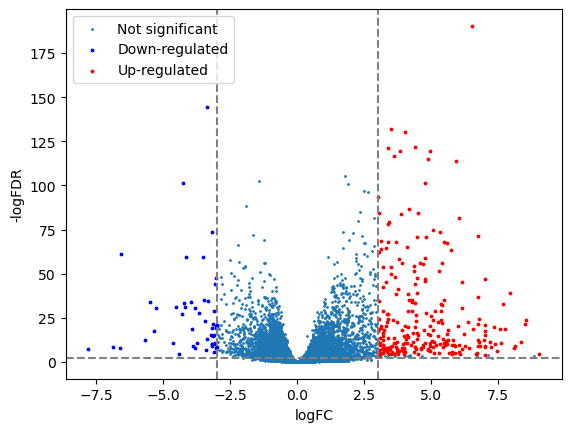

In [51]:
plt.scatter(x=full_results_maize['log2FoldChange'],y=full_results_maize['padj'].apply(lambda x:-np.log10(x)),s=1,label="Not significant")

# highlight down- or up- regulated genes
down_arabi = full_results_maize[(full_results_maize['log2FoldChange']<=-3)&(full_results_maize['padj']<=0.0001)]
up_arabi = full_results_maize[(full_results_maize['log2FoldChange']>=3)&(full_results_maize['padj']<=0.0001)]

plt.scatter(x=down_arabi['log2FoldChange'],y=down_arabi['padj'].apply(lambda x:-np.log10(x)),s=3,label="Down-regulated",color="blue")
plt.scatter(x=up_arabi['log2FoldChange'],y=up_arabi['padj'].apply(lambda x:-np.log10(x)),s=3,label="Up-regulated",color="red")
plt.xlabel("logFC")
plt.ylabel("-logFDR")
plt.axvline(-3,color="grey",linestyle="--")
plt.axvline(3,color="grey",linestyle="--")
plt.axhline(2,color="grey",linestyle="--")
plt.legend()

In [25]:
up_arabi

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Locus,,,,,,
AT1G03070,244.041301,4.909129,0.676055,7.261436,3.830035e-13,1.623916e-11
AT1G03470,272.881762,4.077672,0.438625,9.296489,1.451593e-20,1.559438e-18
AT1G07050,78.272039,5.614861,0.772109,7.272106,3.539261e-13,1.515305e-11
AT1G07400,5542.233763,4.257430,0.479868,8.872089,7.178661e-19,6.547163e-17
AT1G08560,64.164207,3.086038,0.460190,6.706012,2.000148e-11,6.236203e-10
...,...,...,...,...,...,...
ATMG01170,114.058124,3.130845,0.402513,7.778240,7.354054e-15,3.999281e-13
ATMG01190,58.267544,5.149719,0.615456,8.367329,5.893919e-17,4.229853e-15
ATMG01200,247.691931,4.696561,0.372497,12.608320,1.899999e-36,6.931433e-34


In [26]:
up

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
LOC104645776,16.743984,5.407347,1.185733,4.560342,5.107049e-06,1.433444e-05
LOC101256908,636.987165,5.521131,0.434430,12.708905,5.276819e-37,1.509383e-35
LOC101245874,1193.548538,3.648663,0.271307,13.448487,3.142367e-41,1.126178e-39
MIR6026,348.085222,4.175639,0.238158,17.533045,8.015952e-69,8.685991e-67
JMJ524,103.081531,3.221060,0.407344,7.907461,2.626907e-15,1.976726e-14
...,...,...,...,...,...,...
CQW56_mgp29,23.900533,4.075286,0.794088,5.132033,2.866288e-07,9.469135e-07
CQW56_mgp16,115.817361,4.108246,0.454575,9.037554,1.602165e-19,1.651566e-18
CQW56_mgp11,179.570123,4.119752,0.461701,8.922987,4.538792e-19,4.524301e-18
CQW56_mgp10,81.092169,3.543048,0.562626,6.297344,3.027894e-10,1.409218e-09


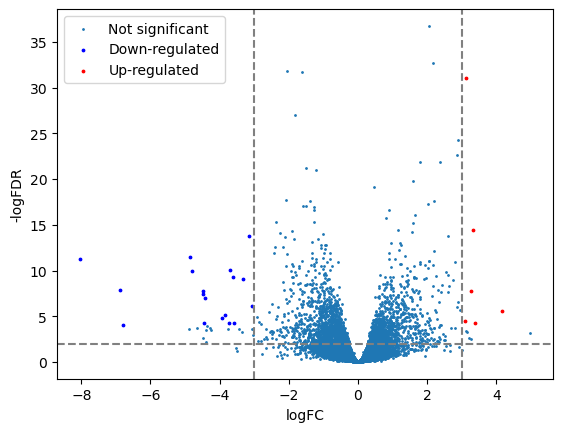

In [52]:
plt.scatter(x=full_results_sorg['log2FoldChange'],y=full_results_sorg['padj'].apply(lambda x:-np.log10(x)),s=1,label="Not significant")

# highlight down- or up- regulated genes
down = full_results_sorg[(full_results_sorg['log2FoldChange']<=-3)&(full_results_sorg['padj']<=0.0001)]
up = full_results_sorg[(full_results_sorg['log2FoldChange']>=3)&(full_results_sorg['padj']<=0.0001)]

plt.scatter(x=down['log2FoldChange'],y=down['padj'].apply(lambda x:-np.log10(x)),s=3,label="Down-regulated",color="blue")
plt.scatter(x=up['log2FoldChange'],y=up['padj'].apply(lambda x:-np.log10(x)),s=3,label="Up-regulated",color="red")
plt.xlabel("logFC")
plt.ylabel("-logFDR")
plt.axvline(-3,color="grey",linestyle="--")
plt.axvline(3,color="grey",linestyle="--")
plt.axhline(2,color="grey",linestyle="--")
plt.legend()